# 메인화면 페이지 화면캡쳐 및 저장

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [65]:
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [66]:
url_page = 'https://www.istarbucks.co.kr/'
driver.get(url_page)

In [69]:
driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03 > h2 > a').click()

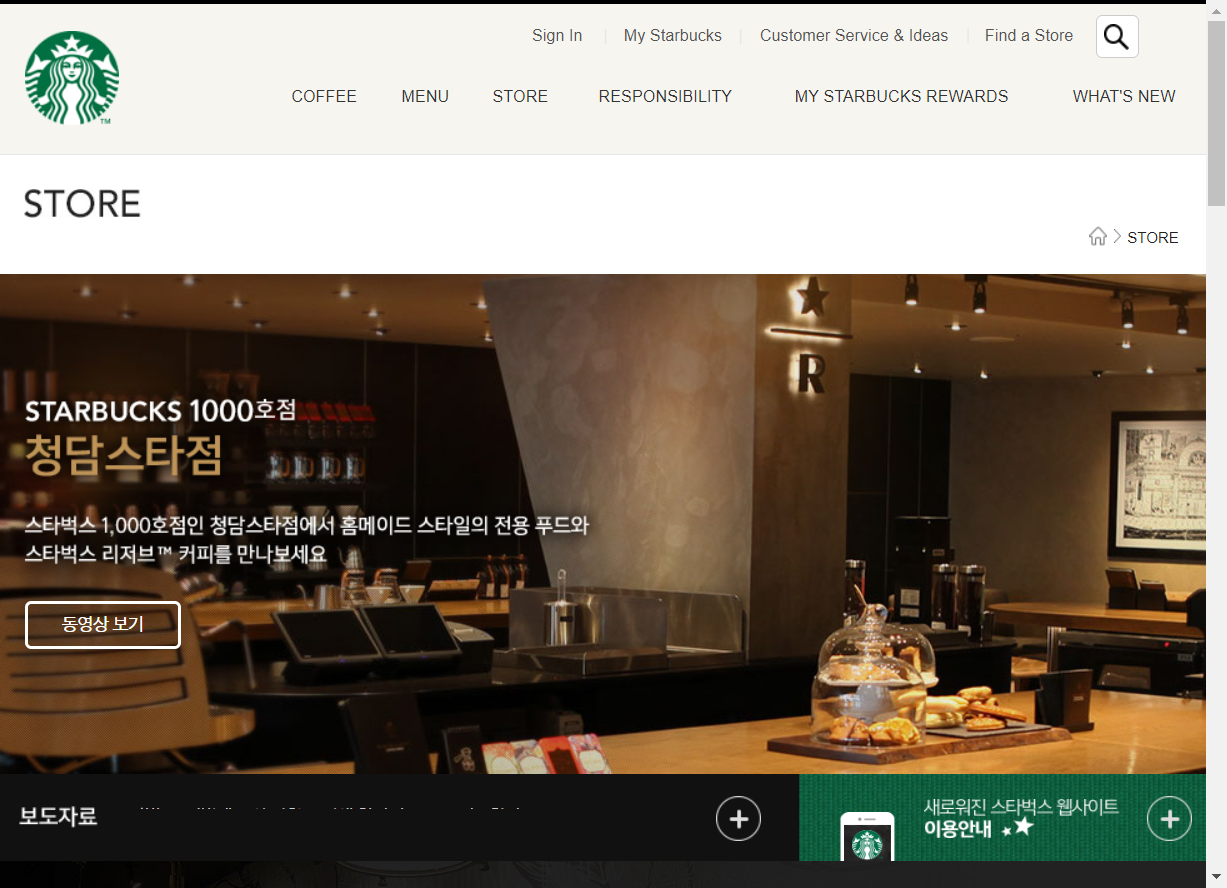

In [14]:
capture_img = './images/starbucks_store.png'
driver.save_screenshot(capture_img)
Image(capture_img)


# 서울지역 스타벅스 매장정보 크롤링

In [103]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import re

In [87]:
html="https://www.istarbucks.co.kr/store/store_map.do?disp=locale"
driver.get(html)

In [88]:
driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a").click()

In [89]:
driver.find_element_by_css_selector("#mCSB_2_container > ul > li:nth-child(1) > a").click()

In [91]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [94]:
tmp = soup.find_all('li','quickResultLstCon')
len(tmp)

499

In [202]:
a=tmp[0].get_text()
a

' 역삼아레나빌딩   서울특별시 강남구 언주로 425 (역삼동)02-568-3762 리저브 매장 2번'

 {'스타벅스매장':sbucksName, 
                          '구'          :sbuksGu, 
                          '주소'        :sbucksAddr, 
                          '전화번호'    :sbucksTel, 
                         }

In [205]:
store=a.split("  ")
store

[' 역삼아레나빌딩', ' 서울특별시 강남구 언주로 425 (역삼동)02-568-3762 리저브 매장 2번']

In [188]:
gu=re.search("\w{1,3}구",a)
if gu is not None:
    gu = gu.group()
else:
    gu = 'No Contact'
gu

'강남구'

In [189]:
tel=re.search('\d{2,3}[-]\d{3,4}[-]\d{4}',a)
if tel is not None:
    tel = tel.group()
else:
    tel = 'No Contact'
tel

'02-6181-3688'

In [190]:
#문자열a의 특정글자b의 위치 찾기  a.find(b)

addr=a[len(store)+1:a.find(tel[0])]
while addr.startswith(" "):
    addr=addr[1:]
    break
addr

'  서울특별시 강남구 광평로 281 (수서동)'

In [216]:
sbucksName=[];
sbuksGu=[];
sbucksAddr=[]; 
sbucksTel=[];

for i in range(0,len(tmp)):
    a=tmp[i].get_text()
    
    store=a.split("  ")[0]
    if store.startswith(" "):
        store=store[1:] 
    sbucksName.append(store)
    
    gu=re.search("\w{1,3}구",a)
    if gu is not None:
        gu = gu.group()
    else:
        gu = 'No Contact'
    sbuksGu.append(gu)
    
    tel=re.search('\d{2,3}[-]\d{3,4}[-]\d{4}',a)
    if tel is not None:
        tel = tel.group()
    else:
        tel = 'No Contact'
    sbucksTel.append(tel)
    
    addr=a[len(store)+1:a.find(tel[0])]
    if addr.startswith("  "):
        addr=addr[2:]
        
    sbucksAddr.append(addr)
    
    print('Top{} Page : Crawling is completed.'.format(i))
else:
    print('-'*50)
    print('크롤링 완료!!!')


Top0 Page : Crawling is completed.
Top1 Page : Crawling is completed.
Top2 Page : Crawling is completed.
Top3 Page : Crawling is completed.
Top4 Page : Crawling is completed.
Top5 Page : Crawling is completed.
Top6 Page : Crawling is completed.
Top7 Page : Crawling is completed.
Top8 Page : Crawling is completed.
Top9 Page : Crawling is completed.
Top10 Page : Crawling is completed.
Top11 Page : Crawling is completed.
Top12 Page : Crawling is completed.
Top13 Page : Crawling is completed.
Top14 Page : Crawling is completed.
Top15 Page : Crawling is completed.
Top16 Page : Crawling is completed.
Top17 Page : Crawling is completed.
Top18 Page : Crawling is completed.
Top19 Page : Crawling is completed.
Top20 Page : Crawling is completed.
Top21 Page : Crawling is completed.
Top22 Page : Crawling is completed.
Top23 Page : Crawling is completed.
Top24 Page : Crawling is completed.
Top25 Page : Crawling is completed.
Top26 Page : Crawling is completed.
Top27 Page : Crawling is completed.
To

Top445 Page : Crawling is completed.
Top446 Page : Crawling is completed.
Top447 Page : Crawling is completed.
Top448 Page : Crawling is completed.
Top449 Page : Crawling is completed.
Top450 Page : Crawling is completed.
Top451 Page : Crawling is completed.
Top452 Page : Crawling is completed.
Top453 Page : Crawling is completed.
Top454 Page : Crawling is completed.
Top455 Page : Crawling is completed.
Top456 Page : Crawling is completed.
Top457 Page : Crawling is completed.
Top458 Page : Crawling is completed.
Top459 Page : Crawling is completed.
Top460 Page : Crawling is completed.
Top461 Page : Crawling is completed.
Top462 Page : Crawling is completed.
Top463 Page : Crawling is completed.
Top464 Page : Crawling is completed.
Top465 Page : Crawling is completed.
Top466 Page : Crawling is completed.
Top467 Page : Crawling is completed.
Top468 Page : Crawling is completed.
Top469 Page : Crawling is completed.
Top470 Page : Crawling is completed.
Top471 Page : Crawling is completed.
T

In [212]:
sbucksName

['역삼아레나빌딩',
 '논현역사거리',
 '국기원사거리',
 '대치대원빌딩R',
 '삼성역섬유센터R',
 '압구정R',
 '수서역R',
 '양재강남빌딩R',
 '선릉동신빌딩R',
 '봉은사로선정릉',
 '강남오거리',
 '스타필드코엑스몰R',
 '강남구청정문',
 '도곡공원',
 '강남R',
 '대치은마사거리',
 '청담영동대로',
 '압구정',
 '신사가로수',
 '청담스타R',
 '강남우성',
 '학동사거리',
 '대치사거리',
 '포스코사거리',
 '을지병원사거리',
 '신사역',
 '도곡역',
 '서울세관사거리',
 '청담사거리',
 '한티역',
 '역삼초교사거리',
 '코엑스몰',
 '가로수길',
 '역삼대로',
 '역삼포스코',
 '강남대로',
 '청담',
 '삼성도심공항',
 '삼성교',
 '학동역',
 '대치',
 '기술센터',
 'SSG마켓도곡R',
 '삼성',
 '선릉세화빌딩',
 '압구정역',
 '압구정로',
 '구역삼사거리',
 '큰길타워',
 '강남구청역',
 '대치역',
 '포이',
 '아크플레이스',
 '학여울역',
 '선정릉역',
 '삼성현대힐',
 'GS타워',
 '압구정미소',
 '선릉역',
 '수서',
 '코엑스사거리',
 '역삼럭키',
 '차병원사거리',
 '청담공원',
 '신압구정',
 '아크로힐스논현',
 '뱅뱅사거리',
 '강남비젼타워',
 '역삼역',
 '압구정로데오역',
 '르네상스사거리',
 '포스코',
 '선릉로',
 '삼성역',
 '논현힐탑',
 '도산가로수길',
 '미아뉴타운',
 '강북구청사거리',
 '미아사거리역',
 '수유역',
 '미아역',
 '우장산역',
 '마곡사이언스타워R',
 '방화DT',
 '마곡나루역',
 '마곡GMG',
 '가양역',
 '화곡DT',
 '양천향교역',
 '화곡동',
 '등촌',
 '염창역',
 '발산역',
 '가양이마트',
 '까치산역',
 '관악서울대입구R',
 '신림DT',
 '서울대역',
 '낙성대DT',
 '사당',
 '보라매대교',
 '신림사거리',
 '신림',


In [213]:
sbuksGu

['강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '압구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '압구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '압구',
 '압구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '압구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '신압구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '압구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '울대입구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '울대입구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '건대입구',
 '광진구',
 '광진구',
 '광진구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금

In [217]:
sbucksAddr

[' 서울특별시 강남구 언주로 425 (역삼동)',
 ' 서울특별시 강남구 강남대로 538 (논현동)',
 ' 서울특별시 강남구 테헤란로 125 (역삼동)',
 ' 서울특별시 강남구 남부순환로 2947 (대치동)',
 ' 서울특별시 강남구 테헤란로 518 (대치동)',
 ' 서울특별시 강남구 언주로 861 (신사동)',
 ' 서울특별시 강남구 광평로 281 (수서동)',
 ' 서울특별시 강남구 남부순환로 2621 (도곡동)',
 ' 서울특별시 강남구 테헤란로 4',
 ' 서울특별시 강남구 봉은사로 446 (삼성동)',
 ' 서울특별시 강남구 봉은사로2길 39 (역삼동)',
 ' 서울특별시 강남구 영동대로 513 (삼성동)',
 ' 서울특별시 강남구 학동로 419 (청담동)',
 ' 서울특별시 강남구 도곡로 2',
 ' 서울특별시 강남구 강남대로 39',
 ' 서울특별시 강남구 도곡로 457 (대치동)',
 ' 서울특별시 강남구 영동대로 72',
 ' 서울특별시 강남구 압구정로3',
 ' 서울특별시 강남구 압구정로12길 32 (신사동)',
 ' 서울특별시 강남구 도산대로57길 24 (청담동)',
 ' 서울특별시 강남구 강남대로 328 (역삼동)',
 ' 서울특별시 강남구 도산대로 328 (논현동) HS빌딩',
 ' 서울특별시 강남구 삼성로 4',
 ' 서울특별시 강남구 테헤란로 5',
 ' 서울특별시 강남구 논현로 752 (논현동,구산빌딩)',
 ' 서울특별시 강남구 도산대로 1',
 ' 서울특별시 강남구 남부순환로 29',
 ' 서울특별시 강남구 언주로 65',
 ' 서울특별시 강남구 도산대로 458 (청담동) 리츠타워',
 ' 서울특별시 강남구 도곡로 4',
 ' 서울특별시 강남구 역삼로 123 (역삼동)',
 ' 서울특별시 강남구 영동대로 513 (삼성동) 코엑스',
 ' 서울특별시 강남구 논현로175길 94, 1~2층 (신사동)',
 ' 서울특별시 강남구 테헤란로 211, 한국고등교육재단빌딩 1층 (역삼동)',
 ' 서울특별시 강남구 테헤란로 134, P

In [215]:
sbucksTel

['02-568-3762',
 '02-3442-3672',
 '02-568-3668',
 '02-568-3704',
 '02-568-3648',
 '02-541-3622',
 '02-6181-3688',
 '02-571-3604',
 '02-2051-3562',
 '02-539-3564',
 '02-557-3484',
 '02-6002-3467',
 '02-514-3397',
 '02-565-3496',
 '02-561-3478',
 '02-554-3315',
 '02-3443-3371',
 '02-541-3306',
 '02-3446-3356',
 '02-514-3364',
 '02-565-3347',
 '02-758-8971',
 '02-561-3287',
 '02-554-3235',
 '02-758-8896',
 '02-758-8848',
 '02-758-8809',
 '02-758-8798',
 '02-758-8726',
 '02-758-8683',
 '02-758-8739',
 '02-758-8733',
 '02-758-8661',
 '02-758-8626',
 '02-758-8631',
 '02-758-8624',
 '02-758-8659',
 '02-758-8635',
 '02-758-8592',
 '02-758-8101',
 '02-758-8063',
 '02-6009-3410',
 '02-2191-1219',
 '02-758-8038',
 '02-758-8028',
 '02-758-8013',
 '02-758-8231',
 '02-758-8247',
 '02-758-8116',
 '02-758-8119',
 '02-758-8120',
 '02-758-8122',
 '02-758-8158',
 '02-758-8151',
 '02-758-8970',
 '02-758-8278',
 '02-758-8129',
 '02-758-8109',
 '02-758-8108',
 '02-758-8165',
 '02-758-8478',
 '02-758-8463',


In [220]:
starbucks = pd.DataFrame({'구'          :sbuksGu,
                          '스타벅스매장':sbucksName,   
                          '전화번호'    :sbucksTel, 
                          '주소'        :sbucksAddr,
                         })

starbucks.head(10)

,구,스타벅스매장,전화번호,주소
0,강남구,역삼아레나빌딩,02-568-3762,서울특별시 강남구 언주로 425 (역삼동)
1,강남구,논현역사거리,02-3442-3672,서울특별시 강남구 강남대로 538 (논현동)
2,강남구,국기원사거리,02-568-3668,서울특별시 강남구 테헤란로 125 (역삼동)
3,강남구,대치대원빌딩R,02-568-3704,서울특별시 강남구 남부순환로 2947 (대치동)
4,강남구,삼성역섬유센터R,02-568-3648,서울특별시 강남구 테헤란로 518 (대치동)
5,압구,압구정R,02-541-3622,서울특별시 강남구 언주로 861 (신사동)
6,강남구,수서역R,02-6181-3688,서울특별시 강남구 광평로 281 (수서동)
7,강남구,양재강남빌딩R,02-571-3604,서울특별시 강남구 남부순환로 2621 (도곡동)
8,강남구,선릉동신빌딩R,02-2051-3562,서울특별시 강남구 테헤란로 4
9,강남구,봉은사로선정릉,02-539-3564,서울특별시 강남구 봉은사로 446 (삼성동)


In [316]:
#압구정의 압구를 뽑은 것은 강남구로 고쳐주자.

starbucks.loc[starbucks.구=="압구","구"]='강남구'
starbucks.loc[starbucks.구=="신압구","구"]='강남구'
starbucks.loc[starbucks.구=="성대입구","구"]='종로구'
starbucks.loc[starbucks.구=="울대입구","구"]='관악구'
starbucks.loc[starbucks.구=="천향입구","구"]='용산구'
starbucks.loc[starbucks.구=="건대입구","구"]='광진구'
starbucks.loc[starbucks.구=="계산입구","구"]='서초구'
starbucks.loc[starbucks.구=="홍대입구","구"]='마포구'
starbucks.loc[starbucks.구=="숙대입구","구"]='용산구'
starbucks.loc[starbucks.구=="마을입구","구"]='서초구'
starbucks.loc[starbucks.구=="실대입구","구"]='동작구'
starbucks.loc[starbucks.구=="동대입구","구"]='중구'
starbucks.loc[starbucks.구=="명동입구","구"]='중구'
starbucks.head(10)

,구,스타벅스매장,전화번호,주소
0,강남구,역삼아레나빌딩,02-568-3762,서울특별시 강남구 언주로 425 (역삼동)
1,강남구,논현역사거리,02-3442-3672,서울특별시 강남구 강남대로 538 (논현동)
2,강남구,국기원사거리,02-568-3668,서울특별시 강남구 테헤란로 125 (역삼동)
3,강남구,대치대원빌딩R,02-568-3704,서울특별시 강남구 남부순환로 2947 (대치동)
4,강남구,삼성역섬유센터R,02-568-3648,서울특별시 강남구 테헤란로 518 (대치동)
5,강남구,압구정R,02-541-3622,서울특별시 강남구 언주로 861 (신사동)
6,강남구,수서역R,02-6181-3688,서울특별시 강남구 광평로 281 (수서동)
7,강남구,양재강남빌딩R,02-571-3604,서울특별시 강남구 남부순환로 2621 (도곡동)
8,강남구,선릉동신빌딩R,02-2051-3562,서울특별시 강남구 테헤란로 4
9,강남구,봉은사로선정릉,02-539-3564,서울특별시 강남구 봉은사로 446 (삼성동)


# 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. 
### (스벅비율 = alpha x 100 / 스타벅스매장수/인구수)

In [326]:
population_xls = './data/Report_seoul_population_2019_2Q.xls'
population=pd.read_excel(population_xls,header=2,usecols="B,C,D,M,N")
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4304243,10041574,2.27,1451564
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370


In [327]:
#열 이름 바꾸기
population.rename(columns={"계":"인구수"},inplace=True)
population.head()

,자치구,세대,인구수,세대당인구,65세이상고령자
0,합계,4304243,10041574,2.27,1451564
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370


In [328]:
#첫변째 열 제거
population = population[1:]
population.head()

,자치구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773


In [329]:
#index

population.set_index("자치구",inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자
자치구,,,,
종로구,73828,162413,2.06,27155
중구,62156,136276,2.03,22749
용산구,109692,245069,2.09,38259
성동구,136872,312991,2.23,43370
광진구,163914,369470,2.16,46773


In [330]:
population["고령비율"]=population["65세이상고령자"]/population["인구수"]*100
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
자치구,,,,,
종로구,73828,162413,2.06,27155,16.719721
중구,62156,136276,2.03,22749,16.693328
용산구,109692,245069,2.09,38259,15.611522
성동구,136872,312991,2.23,43370,13.856628
광진구,163914,369470,2.16,46773,12.659485


In [331]:
tmpCounts = starbucks['구'].value_counts()
tmpCounts

강남구     76
중구      50
서초구     45
종로구     39
영등포구    35
마포구     32
송파구     29
서대문구    21
용산구     17
강서구     14
양천구     14
광진구     14
강동구     13
노원구     12
성북구     11
관악구     10
금천구     10
구로구     10
동작구      9
성동구      9
동대문구     8
은평구      8
중랑구      6
강북구      5
도봉구      2
Name: 구, dtype: int64

In [332]:
population = pd.concat([population, tmpCounts], axis=1, sort=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,구
강남구,230752,547602,2.35,69011,12.602401,76
강동구,177368,428547,2.39,60657,14.154107,13
강북구,143650,319377,2.20,59189,18.532643,5
강서구,261383,602230,2.28,81965,13.610249,14
관악구,266692,519864,1.88,73693,14.175438,10


In [333]:
#열 이름 바꾸기
population.rename(columns={"구":"스타벅스"},inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스
강남구,230752,547602,2.35,69011,12.602401,76
강동구,177368,428547,2.39,60657,14.154107,13
강북구,143650,319377,2.20,59189,18.532643,5
강서구,261383,602230,2.28,81965,13.610249,14
관악구,266692,519864,1.88,73693,14.175438,10


#### 스벅비율=alpha*100*스타벅스매장수/인구수

In [342]:
population["스벅비율"]=population["스타벅스"]/population["인구수"]*100*10000
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
강동구,177368,428547,2.39,60657,14.154107,13,30.335062
강북구,143650,319377,2.20,59189,18.532643,5,15.655479
강서구,261383,602230,2.28,81965,13.610249,14,23.246932
관악구,266692,519864,1.88,73693,14.175438,10,19.235800


# 스벅비율 및 스벅매장수를 서울시 지도에 시각화 

In [337]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [340]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population.index, 'counts':population["스타벅스"]})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [341]:
map  #스벅매장수를 서울시 지도에 시각화

In [345]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population.index, 'counts':population["스벅비율"]})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

In [346]:
map #스벅비율을 서울시 지도에 시각화

# 스벅비율이 반영된 파일을 저장 

In [347]:
# 데이터 저장
population.to_csv('data/seoul_population_sbucks.csv', sep=',', encoding='euc-kr')